In [20]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/AUP-CS2091/Week-8/master/churn_train.csv?token=AFj8VRqjWJV3qHTNigar9MFsnq68-cFcks5Z8ie8wA%3D%3D')
tdata = pd.read_csv('https://raw.githubusercontent.com/AUP-CS2091/Week-8/master/churn_test.csv?token=AFj8VUJJdGcDbMzoty9Joi26M-XTPoOtks5Z8iftwA%3D%3D')

data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


* COLLEGE : Is the customer college educated?
* INCOME	: Annual income
* OVERAGE	: Average overcharges per month
* LEFTOVER : Average % leftover minutes per month
* HOUSE : Value of dwelling (from census tract)
* HANDSET_PRICE : Cost of phone
* OVER_15MINS_CALLS_PER_MONTH : Average number of long (>15 mins) calls per month
* AVERAGE_CALL_DURATION : Average call duration
* REPORTED_SATISFACTION : Reported level of satisfaction
* REPORTED_USAGE_LEVEL : Self-reported usage level
* CONSIDERING_CHANGE_OF_PLAN : Was customer considering changing his/her plan?
* LEAVE : Class variable: whether customer left or stayed

In [21]:
data['COLLEGE'] = data['COLLEGE'].astype('category').cat.codes
data['REPORTED_SATISFACTION'] = data['REPORTED_SATISFACTION'].astype('category').cat.codes
data['REPORTED_USAGE_LEVEL'] = data['REPORTED_USAGE_LEVEL'].astype('category').cat.codes
data['CONSIDERING_CHANGE_OF_PLAN'] = data['CONSIDERING_CHANGE_OF_PLAN'].astype('category').cat.codes
data['LEAVE'] = data['LEAVE'].astype('category').cat.codes

tdata['COLLEGE'] = tdata['COLLEGE'].astype('category').cat.codes
tdata['REPORTED_SATISFACTION'] = tdata['REPORTED_SATISFACTION'].astype('category').cat.codes
tdata['REPORTED_USAGE_LEVEL'] = tdata['REPORTED_USAGE_LEVEL'].astype('category').cat.codes
tdata['CONSIDERING_CHANGE_OF_PLAN'] = tdata['CONSIDERING_CHANGE_OF_PLAN'].astype('category').cat.codes

from sklearn.tree import DecisionTreeClassifier

X = data.loc[:, data.columns != 'LEAVE']
y = data['LEAVE']

X_pred = tdata

model = DecisionTreeClassifier(max_depth=10)
model.fit(X,y)
probs = model.predict_proba(X_pred)

tdata['PLEAVE'] = probs[:,0]
tdata.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,PLEAVE
0,0,41697,151,36,496971,445,25,2,4,2,1,0.893130
1,0,83444,66,0,905435,255,3,14,2,2,1,0.161458
2,1,28096,64,35,165131,247,3,1,2,3,0,0.340909
3,0,32740,0,0,175285,206,0,14,2,4,0,0.349206
4,0,81630,0,20,469753,329,1,4,4,2,0,0.098901


In [22]:
import numpy as np
rng = np.arange(1,40,5)

In [23]:
from sklearn.metrics import accuracy_score
acc = []
X = data.loc[:, data.columns != 'LEAVE']
y = data.loc[:, 'LEAVE']
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X,y)
    acc.append(accuracy_score(y,model.predict(X)))

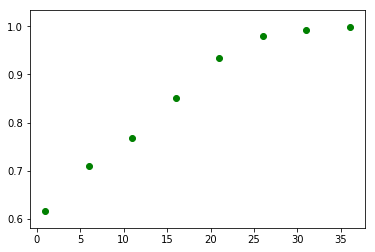

In [24]:
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, acc, c='green')

In [25]:
X = data.loc[:, data.columns != 'LEAVE']
y = data.loc[:, 'LEAVE']

from sklearn import model_selection

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, train_size=0.8)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
from sklearn.metrics import accuracy_score
acc = []
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X_train,y_train)
    acc.append(accuracy_score(y_train,model.predict(X_train)))

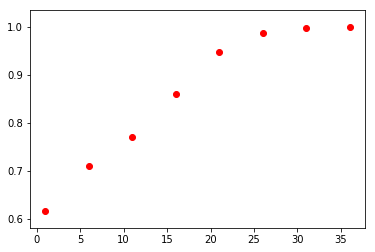

In [27]:
plt.scatter(rng, acc, c='red')

In [28]:
from sklearn.metrics import accuracy_score
acc2 = []
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X_train,y_train)
    acc2.append(accuracy_score(y_test,model.predict(X_test)))

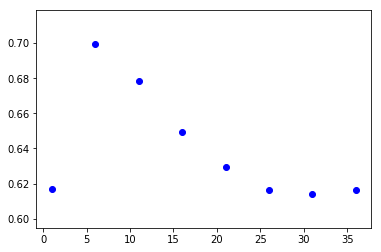

In [29]:
plt.scatter(rng, acc2, c='blue')

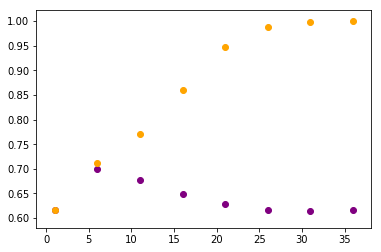

In [30]:
plt.scatter(rng, acc2, c='purple')
plt.scatter(rng, acc, c='orange')


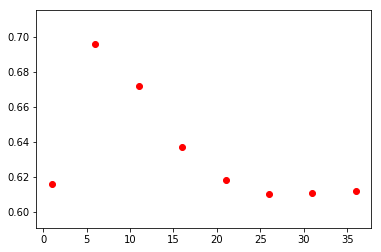

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(max_depth=10)
scores = cross_val_score(model, X,y,cv=5)
mean = scores.mean()
rng = np.arange(1,40,5)
scor=[]
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X,y)
    scor.append(cross_val_score(model,X,y,cv=5).mean())
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng, scor, c='red')

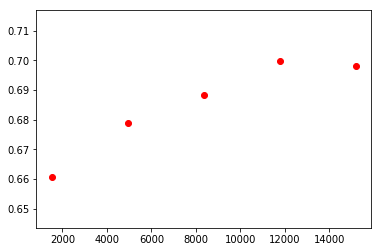

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
model = DecisionTreeClassifier(max_depth=5)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
mean_values = np.mean(test_scores, axis=1)

plt.scatter(train_sizes, mean_values, c='red')

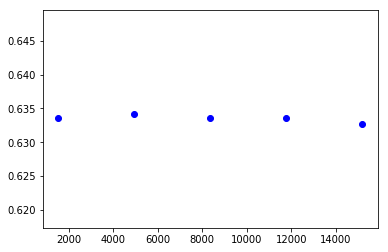

In [33]:
model2 = LogisticRegression()
train, train_s, test = learning_curve(model2, X, y, cv=5)
mean_v = np.mean(test, axis=1)
plt.scatter(train, mean_v, c='blue')

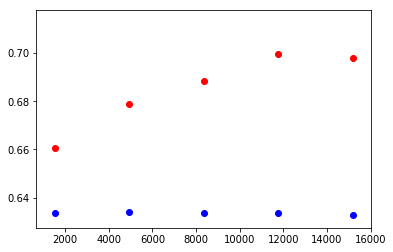

In [34]:
plt.scatter(train_sizes, mean_values, c='red')
plt.scatter(train, mean_v, c='blue')

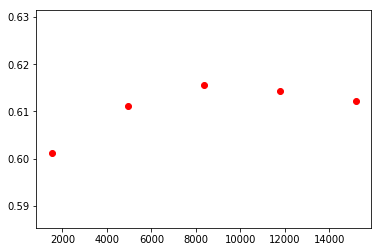

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=s)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
mean_values = np.mean(test_scores, axis=1)

plt.scatter(train_sizes, mean_values, c='red')

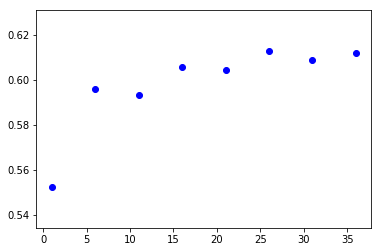

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_depth=10)
scores = cross_val_score(model, X,y,cv=5)
mean = scores.mean()

rng3 = np.arange(1,40,5)
scor=[]

for s in rng3:
    model4 = KNeighborsClassifier(n_neighbors = s)
    model4.fit(X_train,y_train)
    scor.append(cross_val_score(model4,X,y,cv=5).mean())
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng3, scor, c='blue')

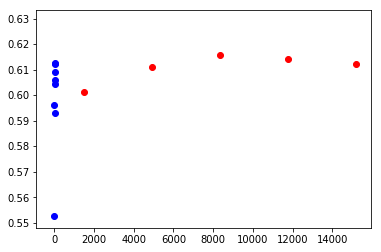

In [37]:
plt.scatter(train_sizes, mean_values, c='red')
plt.scatter(rng3, scor, c='blue')

In [38]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
clusters = clusters.fit_predict(data)

NameError: name 'clusters' is not defined

## Assignment 7
### Question 1

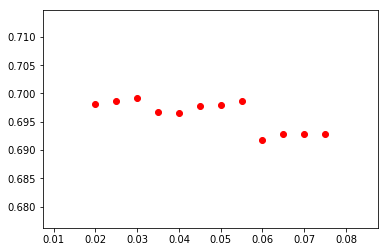

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

rng4 = np.arange(0.02,0.08,0.005)
scor=[]

for s in rng4:
    model4 = DecisionTreeClassifier(min_weight_fraction_leaf=s)
    model4.fit(X_train,y_train)
    scor.append(cross_val_score(model4,X,y,cv=5).mean())
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng4, scor, c='red')

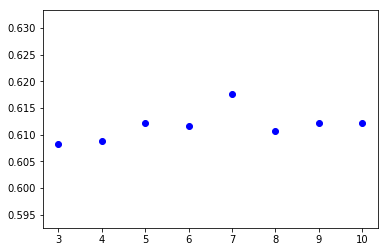

In [40]:
rng5 = np.arange(3,11,1)
scor2=[]

for s in rng5:
    model5 = DecisionTreeClassifier(max_features=s)
    model5.fit(X_train,y_train)
    scor2.append(cross_val_score(model5,X,y,cv=5).mean())
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng5, scor2, c='blue')

### Question 2

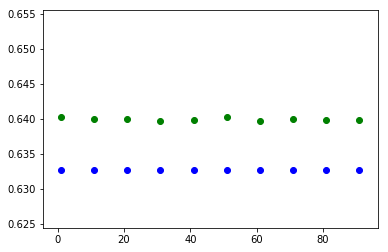

In [41]:
rng6 = np.arange(1,100,10)
scor3=[]
scor4=[]

for s in rng6:
    model6 = LogisticRegression(penalty="l1")
    model6.fit(X_train,y_train)
    scor3.append(cross_val_score(model6,X,y,cv=5).mean())

for s in rng6:
    model7 = LogisticRegression(penalty="l2")
    model7.fit(X_train,y_train)
    scor4.append(cross_val_score(model7,X,y,cv=5).mean())
    
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng6, scor3, c='green')
plt.scatter(rng6, scor4, c='blue')

### Question 3

In [42]:
scorb=[]

for s in rng4:
    model8 = DecisionTreeClassifier(min_weight_fraction_leaf=s)
    model8.fit(X_train,y_train)
    scorb.append(accuracy_score(y_test,model8.predict(X_test)))
    
scor2b=[]

for s in rng5:
    model9 = DecisionTreeClassifier(max_features=s)
    model9.fit(X_train,y_train)
    scor2b.append(accuracy_score(y_test,model9.predict(X_test)))
    
scor3b=[]
scor4b=[]

for s in rng6:
    model10 = LogisticRegression(penalty="l1")
    model10.fit(X_train,y_train)
    scor3b.append(accuracy_score(y_test,model10.predict(X_test)))

for s in rng6:
    model11 = LogisticRegression(penalty="l2")
    model11.fit(X_train,y_train)
    scor4b.append(accuracy_score(y_test,model11.predict(X_test)))

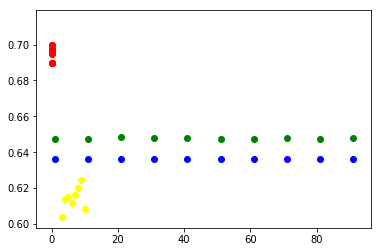

In [43]:
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(rng4, scorb, c='red')
plt.scatter(rng5, scor2b, c='yellow')
plt.scatter(rng6, scor3b, c='green')
plt.scatter(rng6, scor4b, c='blue')

In [44]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = model8.predict(X_test)
array = confusion_matrix(y_true, y_pred)
array

array([[1554,  338],
       [ 842, 1066]])

In [48]:
precision = array[1][1]/(array[1][1] + array[0][1])
precision

0.7592592592592593

In [49]:
recall = array[1][1]/(array[1][1] + array[1][0])
recall

0.55870020964360589

In [50]:
f1score = 2 * ((precision * recall)/(precision + recall))
f1score

0.64371980676328511

In [61]:
# Thus in binary classification, the count of true negatives is C_{0,0}, 
# false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
import numpy as np

c_mat = np.zeros((2,2))
c_mat[0][0] = 0
c_mat[0][1] = 100
c_mat[1][1] = 20
c_mat[1][0] = 20

In [62]:
def binary_ev(conf_mat, cost_mat):
    total = conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0] + conf_mat[1][1]
    tnp = conf_mat[0][0]/total
    fnp = conf_mat[1][0]/total
    tpp = conf_mat[1][1]/total
    fpp = conf_mat[0][1]/total
    
    tn = cost_mat[0][0]
    fn = cost_mat[1][0]
    tp = cost_mat[1][1]
    fp = cost_mat[0][1]
    
    ev = tnp*tn + fnp*fn + tpp*tp + fpp*fp 
    
    return ev
    
binary_ev(array, c_mat)

18.93684210526316

In [ ]:
from sklearn.metrics import roc_curve
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_cur